<a href="https://colab.research.google.com/github/CourbotA/DataScienceFootbal/blob/main/DataWebScapingipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/

Mounted at /gdrive
/gdrive/MyDrive


In [2]:
! pip install requests
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup


Get the teams URL from fbref

In [ ]:
URL = "https://fbref.com/en/comps/13/Ligue-1-Stats"
page = requests.get(URL)
soup = BeautifulSoup(page.content, "html.parser")
standings_table = soup.select('table.stats_table')[0]
links = standings_table.find_all('a')
links = [l.get("href") for l in links ]
links = [l for l in links if '/squads/' in l ]
teamsURL = [f"https://fbref.com{l}" for l in links]


Function to clean to column names of the scapped data

In [ ]:
def clean_column_names(df):
    # Get a list of current column names as tuples
    current_columns = df.columns.tolist()

    # Initialize an empty list to store the new column names
    new_columns = []

    # Iterate over the current column names
    for col in current_columns:
        # If the column is multi-level and doesn't start with 'For' or 'Unnamed'
        if len(col) == 2 and not col[0].startswith(('For', 'Unnamed')):
            # Combine the levels with an underscore and strip any leading/trailing whitespace
            new_columns.append('_'.join(col).strip())
        else:
            # If the column is single-level or starts with 'For' or 'Unnamed', keep it as is
            new_columns.append(col[1])


    # Assign new column names back to the dataframe
    df.columns = new_columns


Function to get the data for the team in position pos

In [ ]:
def get_team_data(pos=0):
  team = teamsURL[pos]
  data = requests.get(team)
  matches= pd.read_html(data.text,match = 'Scores & Fixtures ')[0]

  soup = BeautifulSoup(data.text)
  links = soup.find_all('a')
  links = [l.get("href") for l in links ]

  links_shooting = [l for l in links if l and 'all_comps/shooting' in l]
  links_keeping = [l for l in links if l and 'all_comps/keeper' in l]
  links_passing = [l for l in links if l and 'all_comps/passing' in l]
  links_passing_types = [l for l in links if l and 'all_comps/passing_types' in l]
  links_gca = [l for l in links if l and 'all_comps/gca' in l]
  links_defense = [l for l in links if l and 'all_comps/defense' in l]
  links_possession = [l for l in links if l and 'all_comps/possession' in l]
  links_misc =  [l for l in links if l and 'all_comps/misc' in l]

  data_shooting = requests.get(f"https://fbref.com{links_shooting[0]}")
  shooting = pd.read_html(data_shooting.text, match='Shooting')[0]

  data_keeping = requests.get(f"https://fbref.com{links_keeping[0]}")
  keeping = pd.read_html(data_keeping.text, match='Goalkeeping')[0]


  #Passing
  data_passing = requests.get(f"https://fbref.com{links_passing[0]}")
  passing = pd.read_html(data_passing.text, match='Passing')[0]

  #Passing Type
  data_passing_types = requests.get(f"https://fbref.com{links_passing_types[0]}")
  passing_types = pd.read_html(data_passing_types.text, match='Pass Types')[0]

  #GCA
  data_gca = requests.get(f"https://fbref.com{links_gca[0]}")
  gca = pd.read_html(data_gca.text, match='Goal and Shot Creation')[0]

  #DEF
  data_defense = requests.get(f"https://fbref.com{links_defense[0]}")
  defense = pd.read_html(data_defense.text, match='Defensive Actions')[0]

  #Possession
  data_possession = requests.get(f"https://fbref.com{links_possession[0]}")
  possession = pd.read_html(data_possession.text, match='Possession')[0]

  #misc
  data_misc = requests.get(f"https://fbref.com{links_misc[0]}")
  misc = pd.read_html(data_misc.text, match='Miscellaneous Stats')[0]

  clean_column_names(misc)
  clean_column_names(gca)
  clean_column_names(defense)
  clean_column_names(passing_types)
  clean_column_names(keeping)
  clean_column_names(shooting)
  clean_column_names(passing)
  clean_column_names(possession)


  columns_not_to_keep = ['Date', 'Opponent','Time', 'Comp', 'Round', 'Day', 'Match Report', 'Venue','Result', 'GF', 'GA']

  #only keeping the info of interest  :
  # Shooting
  ligue1_matches_shooting = shooting[shooting['Comp'] == 'Ligue 1']
  ligue1_matches_shooting_columns = ligue1_matches_shooting.columns
  team_data_shooting = ligue1_matches_shooting.drop(columns=columns_not_to_keep[:-4])

  # Keeping
  ligue1_matches_keeping = keeping[keeping['Comp'] == 'Ligue 1']
  ligue1_matches_keeping_columns = ligue1_matches_keeping.columns
  team_data_keeping = ligue1_matches_keeping.drop(columns=columns_not_to_keep)

  # Passing
  ligue1_matches_passing = passing[passing['Comp'] == 'Ligue 1']
  ligue1_matches_passing_columns = ligue1_matches_passing.columns
  team_data_passing = ligue1_matches_passing.drop(columns=columns_not_to_keep)

  # Passing Types
  ligue1_matches_passing_types = passing_types[passing_types['Comp'] == 'Ligue 1']
  ligue1_matches_passing_types_columns = ligue1_matches_passing_types.columns
  team_data_passing_types = ligue1_matches_passing_types.drop(columns=columns_not_to_keep)

  # GCA
  ligue1_matches_gca = gca[gca['Comp'] == 'Ligue 1']
  ligue1_matches_gca_columns = ligue1_matches_gca.columns
  team_data_gca = ligue1_matches_gca.drop(columns=columns_not_to_keep)

  # Defense
  ligue1_matches_defense = defense[defense['Comp'] == 'Ligue 1']
  ligue1_matches_defense_columns = ligue1_matches_defense.columns
  team_data_defense = ligue1_matches_defense.drop(columns=columns_not_to_keep)

  # Possession
  ligue1_matches_possession = possession[possession['Comp'] == 'Ligue 1']
  ligue1_matches_possession_columns = ligue1_matches_possession.columns
  team_data_possession = ligue1_matches_possession.drop(columns=columns_not_to_keep)

  #Miscellaneous Stats
  ligue1_matches_misc = misc[misc['Comp'] == 'Ligue 1']
  ligue1_matches_misc_columns = ligue1_matches_misc.columns
  team_data_misc = ligue1_matches_misc.drop(columns=columns_not_to_keep)

  team_data = pd.concat([team_data_shooting, team_data_keeping, team_data_passing, team_data_passing_types,
                        team_data_gca, team_data_defense, team_data_possession,team_data_misc], axis=1)

  # Mapping function to convert 'w', 'D', and 'L' to numerical values
  # Home and away to numerical values
  result_mapping = {'W': 1, 'D': 0, 'L': -1}
  venue_mapping = {'Home' : 1 , 'Away' : -1}
  team_data['Result'] = team_data['Result'].map(result_mapping)
  team_data['Venue'] = team_data['Venue'].map(venue_mapping)

  return team_data

Part of code to collect and concatenate the data of all the teams in the league

In [ ]:
league_data = []
try:
  for i in range(0,len(teamsURL)):
    #include the team data to the list
    league_data.append(get_team_data(i))
except:
  cat = pd.concat(league_data)
  print(cat.shape)
  cat.to_csv('champdata.csv')


print(league_data)
cat = pd.concat(league_data)
print(cat.shape)
cat.to_csv('champdata.csv')


In [ ]:
import pandas as pd

# List of file names
file_names = ['champdata1.csv', 'champdata2.csv', 'champdata3.csv', 'champdata4.csv', 'champdata5.csv', 'champdata6.csv','champdata7.csv']

# Create an empty list to store the DataFrames
dfs = []

# Load each CSV file into a DataFrame and append it to the list
for file in file_names:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate the DataFrames
concatenated_df = pd.concat(dfs)

# Reset the index of the concatenated DataFrame if needed
concatenated_df = concatenated_df.reset_index(drop=True)

# Print the shape of the concatenated DataFrame
print(concatenated_df.shape)


(760, 145)


In [ ]:
concatenated_df.to_csv('Champ_data.csv')

In [ ]:
datachamp = pd.read_csv('Champ_data.csv')
print(datachamp)
# Drop unnamed columns
datachamp = datachamp.loc[:, ~datachamp.columns.str.contains('^Unnamed')]
print(datachamp)

datachamp.to_csv('league_data.csv', index=False)

     Unnamed: 0.1  Unnamed: 0 Result  GF  GA  Gls    Sh   SoT  SoT%  Dist  \
0               0           1      1   5   0    5  18.0  12.0  66.7  12.9   
1               1           2      1   5   2    4  18.0   8.0  44.4  18.2   
2               2           3      1   7   1    7  16.0   9.0  56.3  11.9   
3               3           4      0   1   1    1  17.0   4.0  23.5  18.7   
4               4           5      1   3   0    3  20.0  12.0  60.0  14.8   
..            ...         ...    ...  ..  ..  ...   ...   ...   ...   ...   
755           755          36      L   1   2    1  10.0   3.0  30.0  19.8   
756           756          37      L   1   3    1   4.0   1.0  25.0  19.4   
757           757          38      D   2   2    2   7.0   3.0  42.9  14.1   
758           758          39      W   2   1    2  18.0   5.0  27.8  20.0   
759           759          40      L   0   1    0   5.0   1.0  20.0  20.5   

     ...  Crs.1  Int.1  TklW.1  PKwon  PKcon   OG  Recov   Won  Lost.1  Won

In [ ]:
print(np.shape(league_data))
cat = pd.concat(league_data)
print(cat.shape)
cat.to_csv('champdata6.csv')

(4, 38, 144)
(152, 144)


<ipython-input-66-00ad2b590543>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = team_data.corr()


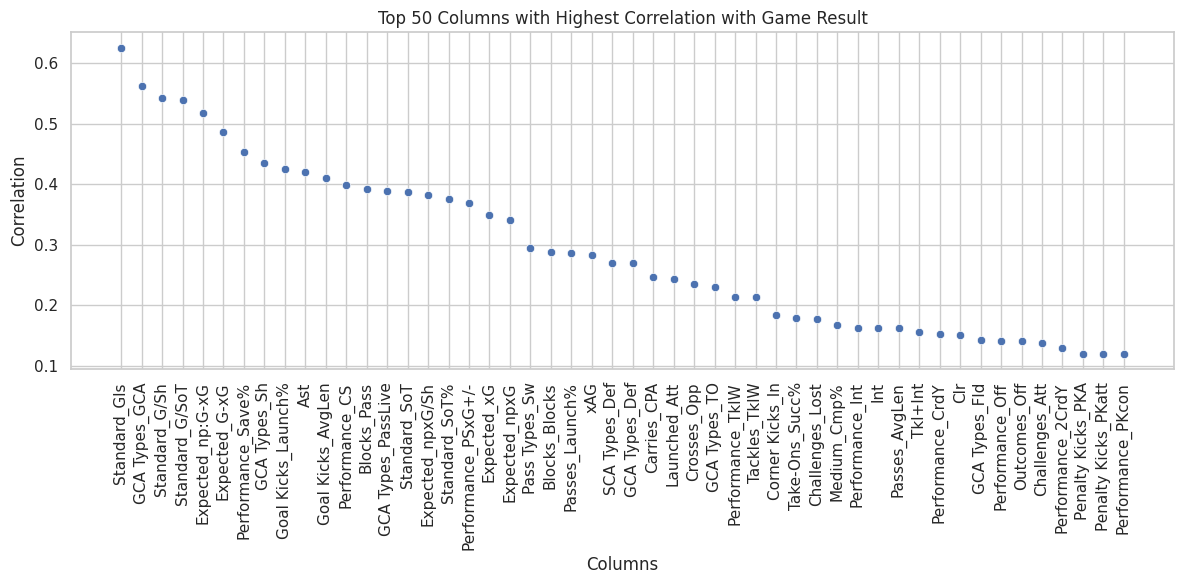

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_correlations(dataframe, column_to_correlate, threshold=0.5, top_n=50):
    """
    This function plots the top_n columns of a DataFrame that have the highest correlation
    with the specified column_to_correlate.

    :param dataframe: pandas DataFrame
    :param column_to_correlate: The column with which correlations are calculated
    :param threshold: The correlation threshold
    :param top_n: The top n correlations to plot
    """

    correlation_matrix = dataframe.corr()
    correlations_with_column = correlation_matrix[column_to_correlate].drop(column_to_correlate)
    sorted_correlations = correlations_with_column.sort_values(ascending=False)

    # Get the top n columns with the highest correlation values
    top_columns = sorted_correlations.head(top_n)
    print(top_columns)

    #Plot the figure
    plt.figure(figsize=(12, 6))
    sns.set(style='whitegrid')
    sns.scatterplot(x=top_columns.index, y=top_columns.values)
    plt.xticks(rotation=90)
    plt.xlabel('Columns')
    plt.ylabel('Correlation')
    plt.title(f'Top {top_n} Columns with Highest Correlation with {column_to_correlate}')
    plt.tight_layout()
    plt.show()



plot_top_correlations(team_data, 'Result', threshold=0.5, top_n=50)
